<a href="https://colab.research.google.com/github/so-dipe/GANs/blob/main/Stable%20Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install diffusers==0.2.3 transformers scipy spacy 

In [9]:
! pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 


In [4]:
! huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [5]:
! git config --global credential.helper store

In [15]:
import cv2
from matplotlib import pyplot as plt

In [6]:
from torch import autocast
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler

In [36]:
lms = LMSDiscreteScheduler(
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule='scaled_linear'
)
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    scheduler=lms,
    use_auth_token=True
).to('cuda')

prompt = 'a unicorn with wings walking on water'

with autocast('cuda'):
  image = pipe(prompt)['sample'][0]

image.save('im1.png')
print('Done!!')

0it [00:00, ?it/s]

Done!!


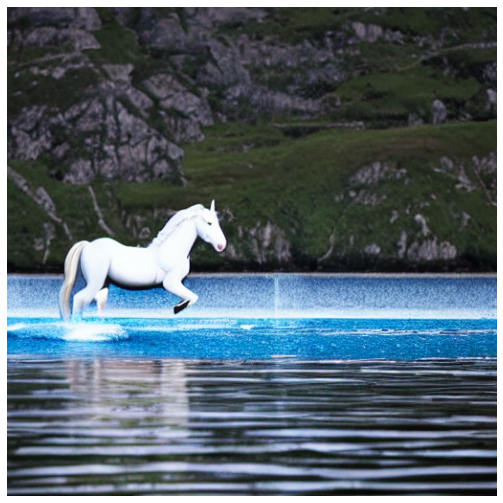

In [37]:
img_color = cv2.imread('/content/im1.png')
fig, ax = plt.subplots(figsize=(16, 9))
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()